## 📘 Short Description: Time Series
**A time series is a sequence of data points recorded or measured at regular time intervals (e.g., daily, monthly, yearly). It captures how a variable changes over time and is commonly used for analysis, forecasting, and pattern recognition.**

**Examples include:**

- Monthly electricity usage

- Daily stock prices

- Hourly temperature readings

***Time series analysis involves understanding patterns such as trend, seasonality, cycles, and random fluctuations to make informed decisions or predictions.***

## 📘 Short Description: Univariate Time Series Data
**Univariate time series data refers to a sequence of observations collected over time for a single variable. It captures how this one variable evolves or behaves over regular time intervals (e.g., daily, monthly, yearly).**

***For example, monthly electricity production values over several years represent univariate time series data — as you're tracking just one variable (electricity generated) over time.***



**Key Characteristics:**
- Involves only one feature (e.g., temperature, stock price, demand).

- Analysis focuses on trend, seasonality, cyclic behavior, and noise.

- Used in forecasting models like AR, ARIMA, Exponential Smoothing, etc.


# 🧱 Key Components of Time Series Data Preparation

## 1. 📅 Resampling
- **Purpose**: Convert data to a consistent frequency (e.g., daily to monthly).
- **Example**: `df.resample('M').mean()`  
- **Use Case**: Handle irregular timestamps, align data to time-based granularity.

---

## 2. 🔍 Windowing
- **Purpose**: Segment data into fixed-size overlapping or non-overlapping windows.
- **Example**: Rolling averages, rolling statistics
- **Use Case**: Local pattern detection, feature extraction, stationarity analysis.

---

## 3. 📈 Extrema Extraction
- **Purpose**: Identify **local maxima (peaks)** and **minima (troughs)**.
- **Use Case**: Detect cycles, turning points, high/low activity periods.

---

## 4. 📦 Interval Extraction
- **Purpose**: Extract meaningful time intervals based on patterns, trends, or statistical criteria.
- **Use Case**: Isolate high-demand periods, regime shifts, stable/volatile phases.

---

## 5. 📊 Trend & Seasonality Analysis
- **Purpose**: Decompose time series into:
  - **Trend** (long-term progression),
  - **Seasonality** (repeating cycles),
  - **Residual** (noise).
- **Use Case**: Understand underlying structure before modeling.

---

## 6. ⚖️ Stationarity Check & Transformation
- **Purpose**: Ensure statistical properties (mean, variance) are constant over time.
- **Tools**: ADF test, KPSS test, differencing, Box-Cox, log transforms
- **Use Case**: Many models like **ARIMA** assume stationarity for reliable performance.


## ℹ️ info About the Dataset Used

Features in `Electric_Production.csv`

Column Name | Description
----------------|---------------------------------------------------------
**DATE**        | The date of the observation, in the format MM/DD/YYYY. Each row is a month.
**IPG2211A2N**    | The value of electric production for that month (seasonally adjusted index).

#### Details:

##### DATE:

- Represents the first day of each month, from January 1985 onward.
- The data is monthly and continuous.

##### IPG2211A2N:
    - This is an index value (not raw units like kWh).
    - It measures the total electric power production in the United States.
    - The values are seasonally adjusted, meaning regular seasonal effects (like higher summer/winter usage) are smoothed out to show underlying trends.

**Typical Use**:
This dataset is commonly used for time series analysis, forecasting, and trend analysis in energy economics.

In [55]:
# Check time stamps
# Inspect data and visualize the time stamps of the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Load the electric production time series data
# Reads the CSV file, parses the "DATE" column as datetime, and sets it as the index
tdf = pd.read_csv('data/Electric_Production.csv', parse_dates=["DATE"], index_col="DATE")

In [57]:
print(tdf.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [58]:
# checking for missing values
# checking for missing values
# This will return the number of missing (NaN) values in each column of the DataFrame `tdf`.
# Useful for identifying incomplete data before further analysis or modeling.
tdf.isnull().sum()

IPG2211A2N    0
dtype: int64

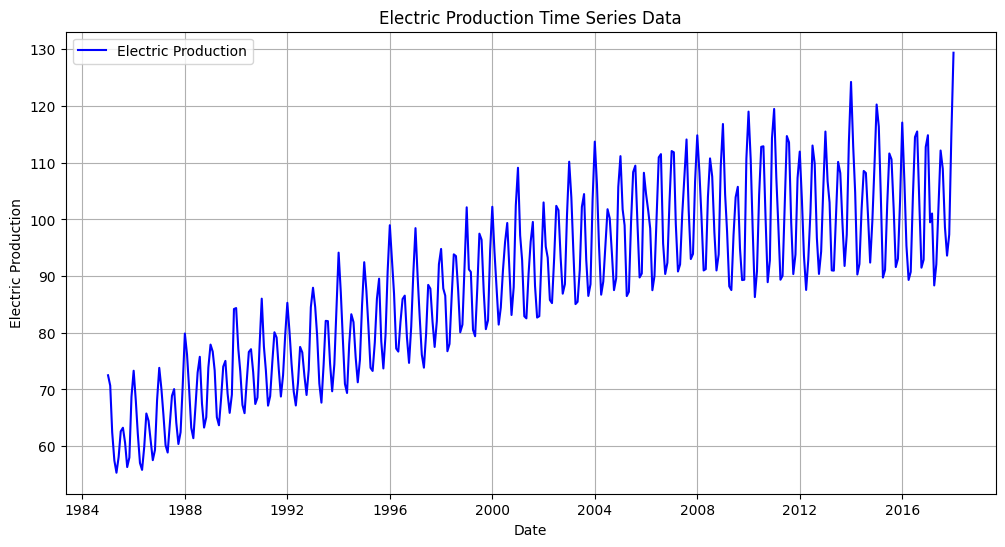

In [59]:
# Plotting the Electric Production Time Series Data (TSD)
# This plot visualizes the 'IPG2211A2N' column from the DataFrame 'tdf' over time.
# - X-axis: Date (from the DataFrame index)
# - Y-axis: Electric Production values
# - The plot helps to inspect trends, seasonality, and anomalies in the time series.

plt.figure(figsize=(12, 6))
plt.plot(tdf.index, tdf["IPG2211A2N"], label="Electric Production", color="blue")
plt.title("Electric Production Time Series Data")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.grid(True)
plt.legend()
plt.show()

In [60]:
tdf.index.duplicated().sum()  # check for duplicate timestamps

np.int64(0)

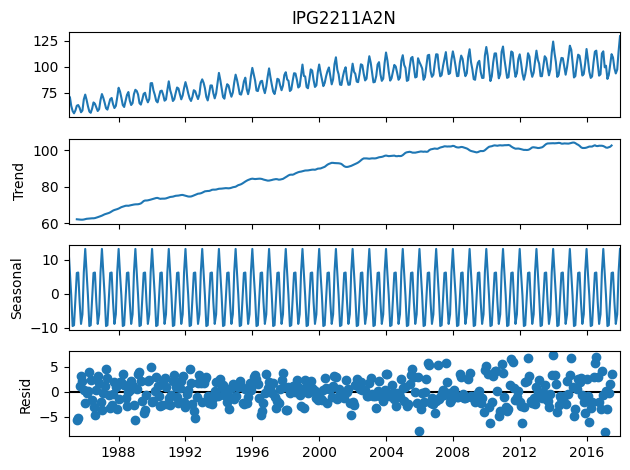

In [61]:
"""
Performs exploratory data analysis (EDA) by decomposing the electric production time series data.

- Uses seasonal_decompose from statsmodels to split the 'IPG2211A2N' column of the DataFrame 'tdf' into trend, seasonal, and residual components.
- Assumes monthly data with a period of 12.
- Plots the decomposition results for visual inspection of trend and seasonality.

Returns:
    None. Displays a decomposition plot.
"""
# EDA
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show() 

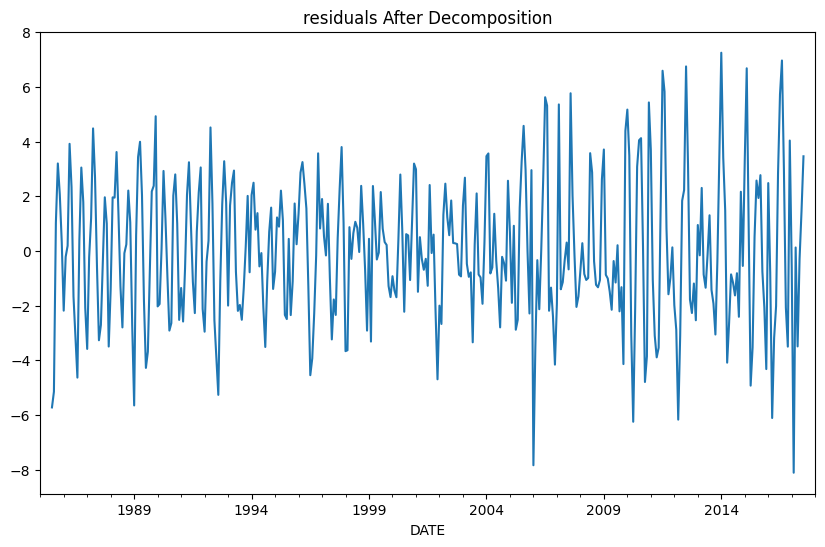

DATE
2006-01-01   -7.835856
2017-02-01   -8.109151
Name: resid, dtype: float64


In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose 
result = seasonal_decompose(tdf["IPG2211A2N"], model='additive', period=12)
residual = result.resid

# Plot residuals
residual.plot(figsize=(10, 6))
plt.title("residuals After Decomposition")
plt.show()


# Detect large residuals
outliers = residual[np.abs(residual) > 3 * residual.std()]
print(outliers)

In [63]:
# checking if the data is stationary
from statsmodels.tsa.stattools import adfuller, kpss

result_adfuller = adfuller(tdf["IPG2211A2N"])
print("ADF Statistic:", result_adfuller[0])
print("p-value:", result_adfuller[1])

"""
Performs the Augmented Dickey-Fuller test to check for stationarity of a time series.

The null hypothesis of the ADF test is that the time series is non-stationary.
A low p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected,
meaning the time series is likely stationary. Conversely, a p-value > 0.05 suggests
the time series is non-stationary.

Args:
    timeseries (pd.Series): The time series data to be tested.

Returns:
    None. Prints the ADF statistic and p-value.
    Prints a statement indicating whether the time series is stationary based on the p-value.
"""


ADF Statistic: -2.25699035004725
p-value: 0.18621469116586592


'\nPerforms the Augmented Dickey-Fuller test to check for stationarity of a time series.\n\nThe null hypothesis of the ADF test is that the time series is non-stationary.\nA low p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected,\nmeaning the time series is likely stationary. Conversely, a p-value > 0.05 suggests\nthe time series is non-stationary.\n\nArgs:\n    timeseries (pd.Series): The time series data to be tested.\n\nReturns:\n    None. Prints the ADF statistic and p-value.\n    Prints a statement indicating whether the time series is stationary based on the p-value.\n'

In [64]:
"""
KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin Test)

The KPSS test is a statistical test used to check the stationarity of a time series. 
It tests whether a time series is stationary around a mean (level stationarity) or around a deterministic trend (trend stationarity).

How it works:
- The test statistic is calculated based on the residuals from the regression of the time series on a constant (or constant and trend).
- The test compares the test statistic to critical values to determine if the null hypothesis can be rejected.

Hypotheses:
- Null Hypothesis (H0): The time series is stationary (level or trend stationary).
- Alternative Hypothesis (H1): The time series is non-stationary (has a unit root).

Significance Value:
- A typical significance level (alpha) is 0.05.
- If the p-value is less than 0.05, reject the null hypothesis and conclude the series is non-stationary.
"""

result_kpss = kpss(tdf["IPG2211A2N"])
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])

KPSS Statistic: 3.5315970094994853
p-value: 0.01


C:\Users\admin\AppData\Local\Temp\ipykernel_38432\2645139395.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(tdf["IPG2211A2N"])


Skewness: -0.07281915414558082
Kurtosis: -0.7005639504294972


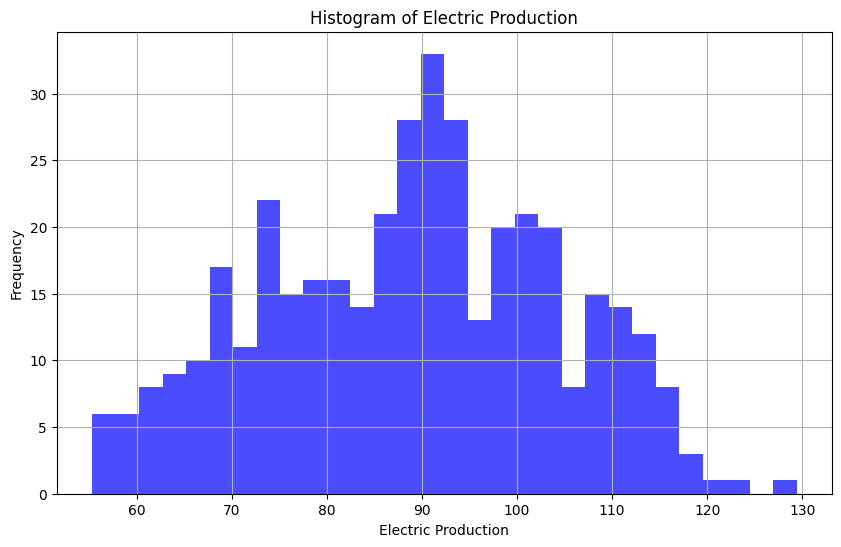

In [65]:
# Checking skewness and kurtosis
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = skew(tdf["IPG2211A2N"])
kurt = kurtosis(tdf["IPG2211A2N"])
print("Skewness:", skewness)
print("Kurtosis:", kurt)
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(tdf["IPG2211A2N"], bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Electric Production")
plt.xlabel("Electric Production")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Converting the non-stationary data to stationary

In [66]:
tdf.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


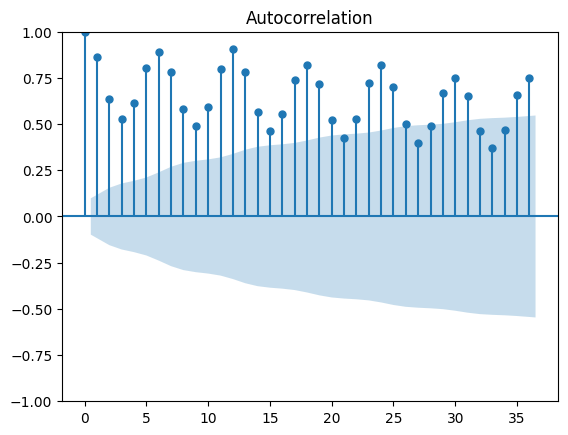

In [67]:
# subtracting the current value from the previous value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tdf["IPG2211A2N"], lags=36)
plt.show()

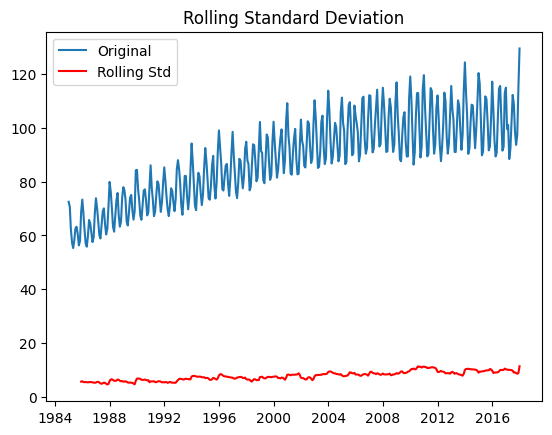

In [68]:
# checking for variance
rolling_std = tdf["IPG2211A2N"].rolling(window=12).std()
plt.plot(tdf["IPG2211A2N"], label='Original')
plt.plot(rolling_std, label='Rolling Std', color='red')
plt.legend()
plt.title("Rolling Standard Deviation")
plt.show()

In [69]:
"""
ARCH Test (Autoregressive Conditional Heteroskedasticity Test)

The ARCH test is a statistical test used to detect the presence of autoregressive conditional heteroskedasticity (ARCH) effects in a time series. 
ARCH effects indicate that the variance of the current error term or innovation is related to the variances of previous time periods' error terms, 
which is common in financial and economic time series.

How it works:
- The test fits a regression model to the squared residuals of a time series.
- It checks whether past squared residuals can explain the current squared residual.
- If the test statistic is significant (low p-value), it suggests the presence of ARCH effects (time-varying volatility).

Use case:
- The ARCH test is commonly used before fitting GARCH or other volatility models to determine if modeling conditional heteroskedasticity is necessary.

Hypotheses:
- Null Hypothesis (H0): No ARCH effects (homoskedasticity; constant variance).
- Alternative Hypothesis (H1): Presence of ARCH effects (heteroskedasticity; time-varying variance).

Interpretation:
- A p-value less than the chosen significance level (e.g., 0.05) indicates rejection of the null hypothesis, suggesting the presence of ARCH effects.
"""


# ARCH test
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(tdf["IPG2211A2N"].dropna())
print("P-value: ", arch_test[1])

P-value:  2.423304983052259e-71


In [70]:
tdf_complement = tdf.copy()

In [71]:
# Applying log transformation to the data to stabilize variance
# Log transformation
tdf_complement["IPG2211A2N"] = np.log(tdf_complement["IPG2211A2N"])

In [72]:
# from scipy.stats import boxcox
# tdf_complement["IPG2211A2N"], lambda_value = boxcox(tdf_complement["IPG2211A2N"])

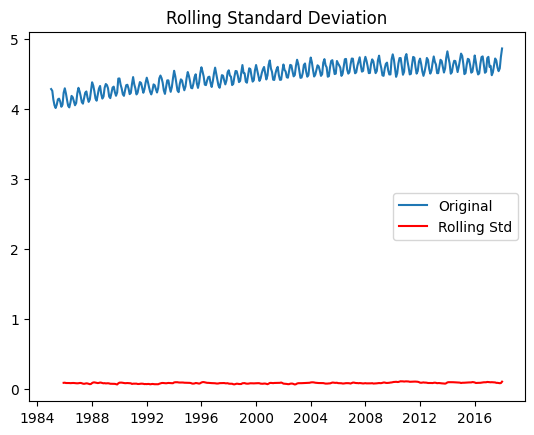

In [73]:
# Checking for variance
rolling_std = tdf_complement["IPG2211A2N"].rolling(window=12).std()
plt.plot(tdf_complement["IPG2211A2N"], label='Original')
plt.plot(rolling_std, label='Rolling Std', color='red')
plt.legend()
plt.title("Rolling Standard Deviation")
plt.show()

In [74]:
arch_test = het_arch(tdf_complement["IPG2211A2N"].dropna())
print("P-value: ", arch_test[1])

P-value:  5.1696768412511864e-73


In [75]:
# from scipy import stats
# tdf_complement["boxcox"], fitted_lambda = stats.boxcox(tdf_complement["IPG2211A2N"])

In [76]:
tdf_complement.head()

,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046


In [77]:
# arch_test = het_arch(tdf_complement["boxcox"].dropna())
# print("P-value: ", arch_test[1])

### Note
A GARCH model predicts the volatility (price jumpiness) of an asset over time. It uses past volatility and price changes to estimate future volatility. It's commonly used in finance for risk management, option pricing, and trading strategies. GARCH(1,1) is a frequently used version.

In [78]:
""" 
Coefficients:

mu: This is the constant term in the mean equation (if you included one). It represents the average value of the series.
omega: This is the constant term in the variance equation. It's the long-run average variance. It must be positive.
alpha[1]: This is the coefficient on the lagged squared residual (the ARCH term). It indicates how much the previous period's shock affects current volatility. It should be positive and less than 1.
beta[1]: This is the coefficient on the lagged conditional variance (the GARCH term). It indicates how much the previous period's volatility affects current volatility. It should be positive and less than 1.
alpha[1] + beta[1]: The sum of these coefficients is crucial. If it's close to 1, it suggests that volatility is very persistent (it takes a long time for shocks to die out). If it's greater than or equal to 1, the model is not stationary, which is a problem.
Significance (P-values):

Look at the p-values associated with each coefficient. A small p-value (typically less than 0.05) indicates that the coefficient is statistically significant, meaning it's unlikely to be zero. Significant coefficients are important for the model.
Model Fit Statistics:

Log-Likelihood: A higher log-likelihood generally indicates a better fit.
AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion): These are used to compare different models. Lower values indicate a better trade-off between model fit and complexity. If you're comparing different GARCH models (e.g., different orders), use these to help choose the best one.
Diagnostics:

Jarque-Bera Test: This tests whether the residuals are normally distributed. GARCH models assume that the standardized residuals (residuals divided by the conditional standard deviation) are normally distributed. A significant p-value here suggests non-normality, which might indicate a problem with the model or the need for a different distribution.
Ljung-Box Test: This tests for autocorrelation in the residuals and squared residuals. Significant autocorrelation suggests that the model is not capturing all the dependence in the data. If there is autocorrelation in the squared residuals, it suggests that there is still ARCH effect in the residuals, and the model is not correctly specified.
Warnings:

Pay attention to any warnings that the arch library might produce. These warnings can indicate potential problems with the model, such as non-stationarity or convergence issues.
In summary, you're looking for: significant coefficients that make sense in the context of your data, a good model fit (as indicated by the AIC/BIC), and no major violations of the model's assumptions (as indicated by the diagnostic tests).

"""



from arch import arch_model

# Drop NaNs from transformation if needed
series = tdf_complement["IPG2211A2N"].dropna()


# Fit GARCH(1,1)
model = arch_model(series, vol='Garch', p=1, q=1)
res = model.fit(disp="off")
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             IPG2211A2N   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                188.714
Distribution:                  Normal   AIC:                          -369.428
Method:            Maximum Likelihood   BIC:                          -353.492
                                        No. Observations:                  397
Date:                Fri, May 23 2025   Df Residuals:                      396
Time:                        11:45:54   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             4.5509  1.330e-02    342.186      0.000 [  4.525,  4.57

c:\Users\admin\Documents\TSA\tsa0\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03213. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [79]:
def test_stationarity(timeseries):
    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(timeseries)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    if adf_result[1] <= 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

test_stationarity(tdf_complement["IPG2211A2N"].dropna())

ADF Statistic: -3.145360428107728
p-value: 0.023373401032985245
The time series is stationary


### Note
You can See by the above results, The GARCH suggest's the data is non-stationary and the ADF test suggests it is stationary
These things usually happen as the ADF always takes in consideration the mean of data, Whilist the GARCH focuses on Variance of Data.


### Consideration
Decompose the data again and visualize the components to get more clear idea of where the data is standing.

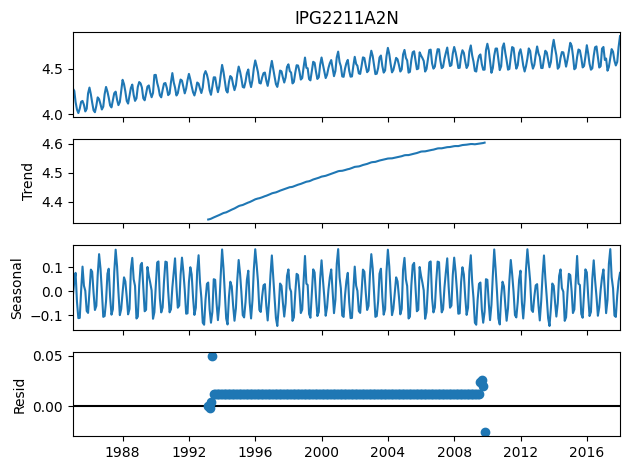

In [80]:
# Checking for seasonality, trend, and residuals
result = seasonal_decompose(tdf_complement["IPG2211A2N"], model='additive', period=197)

# Plot decomposition
result.plot()
plt.show() 

In [81]:
# removing the trend ---> using the difference method
tdf_complement['diff'] = tdf_complement['IPG2211A2N'].diff()
test_stationarity(tdf_complement['diff'].dropna())

ADF Statistic: -6.748333370019134
p-value: 2.995161498116004e-09
The time series is stationary


In [82]:
tdf_complement.head()

,IPG2211A2N,diff
DATE,,
1985-01-01,4.283658,NaN
1985-02-01,4.258049,-0.025609
1985-03-01,4.134369,-0.123680
1985-04-01,4.051287,-0.083082
1985-05-01,4.013046,-0.038242


In [83]:
# Checking out for the missing values

tdf_complement["diff"].isnull().sum()

np.int64(1)

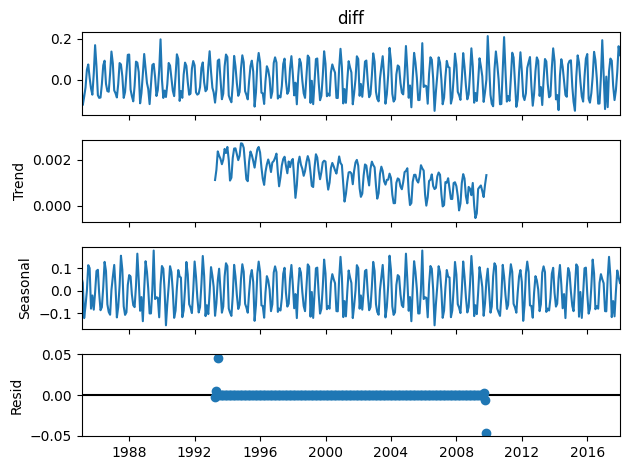

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series data
result = seasonal_decompose(tdf_complement["diff"].dropna(), model='additive', period=197)
# Plot decomposition
result.plot()
plt.show()

In [85]:
# This test is used to check for trends in time series data.
# The Mann-Kendall test is a non-parametric test used to identify trends in time series data.
# It is particularly useful for environmental data, such as temperature or precipitation, where the data may not follow a normal distribution.

import pymannkendall as mk
# Perform Mann-Kendall test

result = mk.original_test(tdf_complement["diff"].dropna())
print(result)

Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.9137622019030154), z=np.float64(-0.10829435302989653), Tau=np.float64(-0.0036568213783403658), s=np.float64(-286.0), var_s=6925930.0, slope=np.float64(-3.8215031175161556e-06), intercept=np.float64(0.00023321064876793128))


### Note:

most standard test for trend in time series.

- It tests the null hypothesis: "The data is stationary around a deterministic trend".

- A low p-value (< 0.05) ⇒ Reject null ⇒ Likely non-stationary (i.e., has a trend).

In [86]:
stat, p_value, lags, crit = kpss(tdf_complement["diff"].dropna(), regression='ct')
print('kpss statistic:', stat)
print('p-value:', p_value)

kpss statistic: 0.08639720417745045
p-value: 0.1


C:\Users\admin\AppData\Local\Temp\ipykernel_38432\3214275154.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, lags, crit = kpss(tdf_complement["diff"].dropna(), regression='ct')


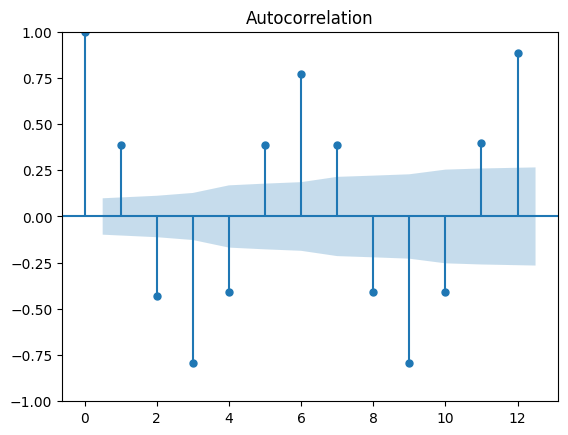

In [87]:
# checking for seasonality of the data
result = plot_acf(tdf_complement[["diff"]].dropna(), lags=12)
plt.show()

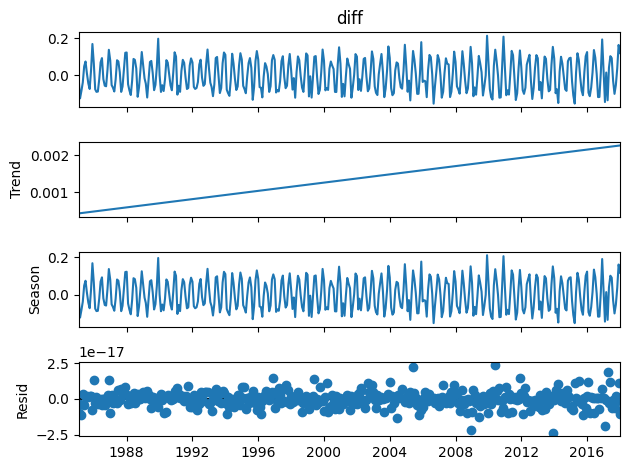

In [88]:
from statsmodels.tsa.seasonal import STL

stl = STL(tdf_complement["diff"].dropna(), period=395)
result = stl.fit()

# Plotting the STL decomposition
result.plot()
plt.show()

In [89]:
from scipy.stats import friedmanchisquare

# Drop NaNs (e.g., from differencing)
values = tdf_complement['diff'].dropna().values

# Ensure the length is divisible by 12 (e.g., complete years)
length = len(values) - (len(values) % 12)
values = values[:length]

# Reshape to (n_years, 12 months)
data = values.reshape(-1, 12)

# Apply Friedman test across columns (months)
stat, p = friedmanchisquare(*data.T)
print(f"Friedman p-value: {p:.6f}")

# If p-value < 0.05, reject the null hypothesis of equal distributions across months
if p < 0.05:
    print("There are significant differences in the distributions of electric production across months, Means Seasonality exists.")   
else:
    print("No significant differences in the distributions of electric production across months, It does not exist.")

Friedman p-value: 0.000000
There are significant differences in the distributions of electric production across months, Means Seasonality exists.


In [90]:
tdf_complement.head()

,IPG2211A2N,diff
DATE,,
1985-01-01,4.283658,NaN
1985-02-01,4.258049,-0.025609
1985-03-01,4.134369,-0.123680
1985-04-01,4.051287,-0.083082
1985-05-01,4.013046,-0.038242


In [91]:
# Seasonal Differencing (Most Common Method)

# 12 months lag (seasonal period)
tdf_complement['diff_comp'] = tdf_complement['diff'] - tdf_complement['diff'].shift(12)


In [92]:
# using fourier transofmers to  check seasonality

signal = tdf_complement["diff_comp"].dropna().values
signal_centered = signal - np.mean(signal)

# step 2: Apply FFT
fft_vals = np.fft.fft(signal_centered)
fft_freq =  np.fft.fftfreq(len(signal_centered))

# step 3: Take only the positive frequencies
positive_freqs = fft_freq[:len(fft_freq) // 2]
magnitude = np.abs(fft_vals)[:len(fft_vals) // 2]

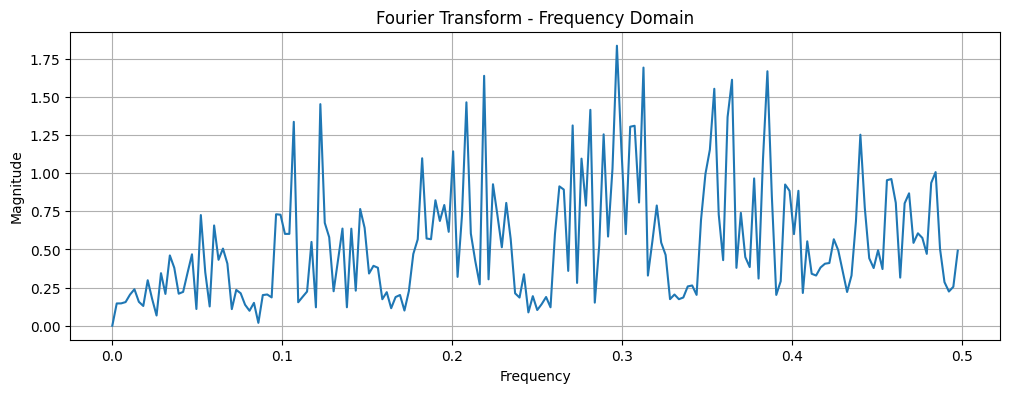

In [93]:
# Step 4: Plot
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, magnitude)
plt.title("Fourier Transform - Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [94]:
# applying the Adfuller test to the transformed data

result_adfuller = adfuller(tdf_complement["diff"].dropna())
print("ADF Statistic:", result_adfuller[0])
print("p-value:", result_adfuller[1])

ADF Statistic: -6.748333370019134
p-value: 2.995161498116004e-09


In [95]:
tdf_complement.head()

,IPG2211A2N,diff,diff_comp
DATE,,,
1985-01-01,4.283658,NaN,NaN
1985-02-01,4.258049,-0.025609,NaN
1985-03-01,4.134369,-0.123680,NaN
1985-04-01,4.051287,-0.083082,NaN
1985-05-01,4.013046,-0.038242,NaN


In [96]:
tdf_complement.drop(columns=["diff_comp"], inplace=True)

In [97]:
# Save the transformed data to a CSV file
tdf_complement.to_csv("data/processed_electric_production.csv", index=True)

### ✅ **Conclusion**

Over the course of the time series preprocessing, we have carefully addressed the following components:

- 📉 **Trend** – Successfully removed
- 🔁 **Seasonality** – Identified and handled
- 📊 **Heteroskedasticity (Changing Variance)** – Attempts made through various transformations, but complete correction wasn't achievable

---

Despite significant efforts, **heteroskedasticity persists** in the data, which is **common in real-world datasets** such as electricity production. This kind of data can naturally exhibit volatility due to structural, seasonal, or external factors that standard transformations may not fully stabilize.

> As a result, while **trend** and **seasonality** have been successfully managed, the data **does not fully meet the conditions for weak stationarity** because variance remains inconsistent over time.

---

### 🧠 What This Means

- The dataset may not be suitable for classical models that assume constant variance (like plain ARIMA).
- More appropriate models include:
  - **GARCH/ARCH** for modeling volatility
  - **State Space** or **Bayesian models** for flexibility
  - **Neural networks (e.g., LSTM)** if moving into deep learning forecasting

---

We’ve made significant progress and built a solid foundation. Going forward, we will work with models that **embrace heteroskedasticity rather than fight it.**


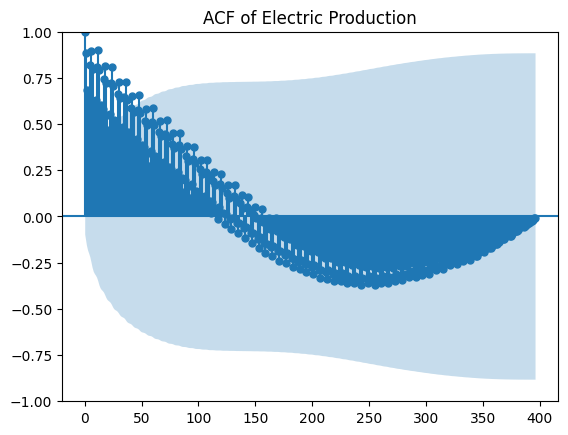

In [107]:
plot_acf(tdf_complement["IPG2211A2N"].dropna(), lags=396, title="ACF of Electric Production")
plt.show()

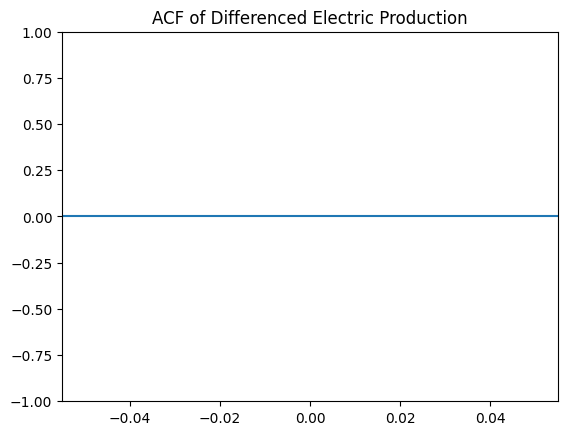

In [110]:
plot_acf(tdf_complement["diff"], lags=396, title="ACF of Differenced Electric Production")
plt.show()